In [5]:
# creating LSTM model for stock market price prediction using multiple input features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error


In [6]:

# load the dataset from yahoo finance API
import yfinance as yf

df = yf.download('AAPL', start='2015-01-01', end='2024-05-24')

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.402174  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.714725  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.716951  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.049515  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.973553  237458000


In [7]:

# get the close price

df = df[['Close']]

print(df.head())

                Close
Date                 
2015-01-02  27.332500
2015-01-05  26.562500
2015-01-06  26.565001
2015-01-07  26.937500
2015-01-08  27.972500


In [8]:

# convert the dataframe to a numpy array

dataset = df.values

print(dataset[:5])

[[27.33250046]
 [26.5625    ]
 [26.56500053]
 [26.9375    ]
 [27.97249985]]


In [10]:

# get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .7)

print(training_data_len)

1655


In [11]:

# scale the data

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5])

[[0.02704744]
 [0.02266059]
 [0.02267484]
 [0.02479704]
 [0.03069364]]


In [12]:


# create the training dataset

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

(1595, 60, 1)
(1595,)


In [16]:

# build the LSTM model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

# train the model

model.fit(x_train, y_train, batch_size=32, epochs=10)



c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - loss: 0.0151
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0013
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 0.0012
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0012
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 9.7295e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 8.6542e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 8.3549e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 9.2131e-04
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 7.3787e-04
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 7.8259e-04


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step
10.415179673640113


C:\Users\AI\AppData\Local\Temp\ipykernel_4344\2091366927.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


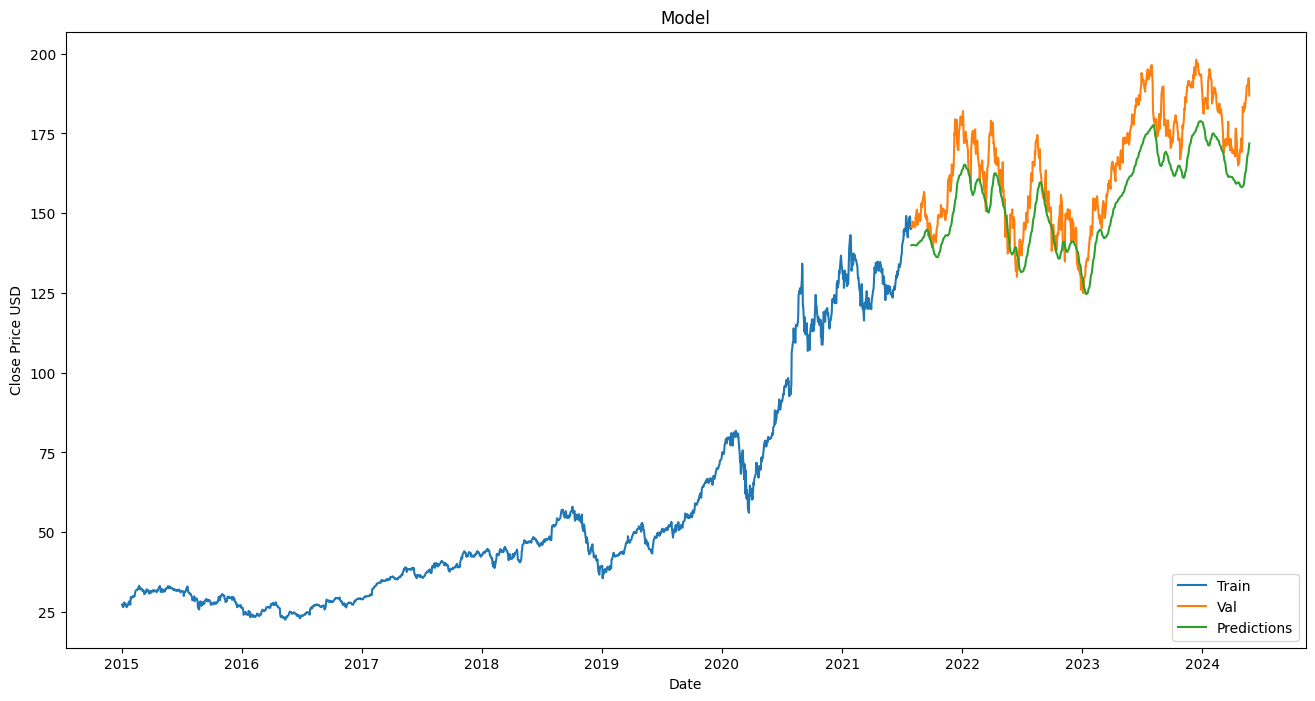

[*********************100%%**********************]  1 of 1 completed

                 Close  Predictions
Date                               
2021-07-30  145.860001   139.970612
2021-08-02  145.520004   140.038361
2021-08-03  147.360001   140.046951
2021-08-04  146.949997   140.037628
2021-08-05  147.059998   140.025421
...                ...          ...
2024-05-17  189.869995   167.851700
2024-05-20  191.039993   168.930618
2024-05-21  192.350006   169.960403
2024-05-22  190.899994   170.942688
2024-05-23  186.880005   171.843338

[709 rows x 2 columns]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[34.004868]]


In [17]:

# create the testing dataset

test_data = scaled_data[training_data_len - 60:, :]

x_test = []

y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the data to a numpy array

x_test = np.array(x_test)

# reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the models predicted price values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)

print(rmse)

# plot the data

train = df[:training_data_len]

valid = df[training_data_len:]

valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# show the valid and predicted prices

print(valid)

# get the quote

apple_quote = yf.download('AAPL', start='2024-05-23', end='2024-05-24')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)











